In [ ]:

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,MaxPool2D,Flatten,Conv2D,Input,Dropout

In [ ]:
trainpath = "/content/drive/MyDrive/Face Mask Dataset/Train"
testpath = "/content/drive/MyDrive/Face Mask Dataset/Test"
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.25)
train_gen = datagen.flow_from_directory(trainpath,
                                        target_size = (96,96),
                                        batch_size = 32,
                                        class_mode = "binary",
                                        subset = "training")
validation_gen = datagen.flow_from_directory(testpath,
                                        target_size = (96,96),
                                        batch_size = 32,
                                        class_mode = "binary",
                                        subset = "validation")

Found 7508 images belonging to 2 classes.
Found 247 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Input(shape=(96,96,3)),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(64,3,activation="relu"),
    MaxPool2D(),
    Conv2D(128,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
h = model.fit(train_gen,epochs=25,validation_data=validation_gen)
loss,acc = model.evaluate(train_gen)
print(f"Training Accuracy: {acc:.4f}")
print(f"Training Loss: {loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1040s 4s/step - accuracy: 0.8962 - loss: 0.2324 - val_accuracy: 0.9393 - val_loss: 0.2420
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 622ms/step - accuracy: 0.9810 - loss: 0.0503 - val_accuracy: 0.9595 - val_loss: 0.1369
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 601ms/step - accuracy: 0.9857 - loss: 0.0448 - val_accuracy: 0.9474 - val_loss: 0.1920
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 608ms/step - accuracy: 0.9891 - loss: 0.0300 - val_accuracy: 0.9595 - val_loss: 0.1244
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 610ms/step - accuracy: 0.9890 - loss: 0.0353 - val_accuracy: 0.9757 - val_loss: 0.0805
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 602ms/step - accuracy: 0.9908 - loss: 0.0250 - val_accuracy: 0.9717 - val_loss: 0.0999
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 615ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9919 - val_loss: 0.0368
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 614ms/step - accuracy: 0.9938 - l

In [ ]:
model.save("mask_detector_model.h5")
from google.colab import files
files.download("mask_detector_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

train_gen.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [ ]:
model1 = load_model('/content/drive/MyDrive/mask_detector_model.h5')
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731,907 (6.61 MB)

 Trainable params: 1,731,905 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

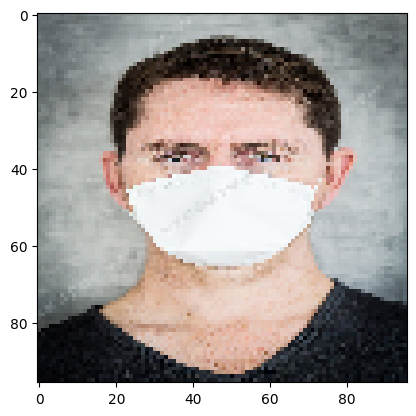

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: With mask 


In [ ]:
import matplotlib.pyplot as plt
img = image.load_img("/content/drive/MyDrive/c0341504-800px-wm.jpg", target_size=(96,96))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
plt.imshow(img_array[0])
plt.show()
prediction = model1.predict(img_array)[0][0]
if prediction < 0.5:
    print("Prediction: With mask ")
else:
    print("Prediction: Without Mask  ")

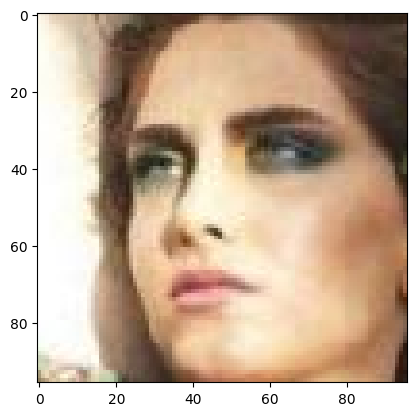

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Without Mask  


In [ ]:
import matplotlib.pyplot as plt
img = image.load_img("/content/drive/MyDrive/Face Mask Dataset/Validation/WithoutMask/1228.png", target_size=(96,96))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
plt.imshow(img_array[0])
plt.show()
prediction = model1.predict(img_array)[0][0]
if prediction < 0.5:
    print("Prediction: With mask ")
else:
    print("Prediction: Without Mask  ")